# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('06-x_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('06-x_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('06-y_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('06-y_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [3]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **NORMALIZACION DE CARACTERISTICAS**

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [33]:
x_train_std

array([[ 0.07, -0.67,  0.41, ..., -1.18, -0.61,  0.23],
       [-0.86, -0.89,  0.59, ...,  0.13,  0.68, -1.92],
       [-0.77, -0.72,  0.51, ...,  0.13,  0.04, -1.  ],
       ...,
       [-0.33, -0.54,  0.2 , ..., -1.01, -1.24, -0.53],
       [-0.6 , -0.32, -0.2 , ..., -1.8 , -0.21, -0.28],
       [ 0.93,  0.61, -1.26, ...,  0.62,  0.44,  0.94]])

# **MODELO DE MARCHINE LEARNING**

In [34]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               11776     
                                                                 
 dense_17 (Dense)            (None, 128)               65664     
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [35]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)#1000
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1000 70
#1000 67
#1250 69
#1300 66
#995 68

Epoch 1/800
16/16 [==============================] - 1s 4ms/step - loss: 1.2451 - accuracy: 0.4070
Epoch 2/800
16/16 [==============================] - 0s 3ms/step - loss: 1.0152 - accuracy: 0.5746
Epoch 3/800
16/16 [==============================] - 0s 3ms/step - loss: 0.8992 - accuracy: 0.6094
Epoch 4/800
16/16 [==============================] - 0s 3ms/step - loss: 0.8143 - accuracy: 0.6380
Epoch 5/800
16/16 [==============================] - 0s 3ms/step - loss: 0.7508 - accuracy: 0.6892
Epoch 6/800
16/16 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.6953
Epoch 7/800
16/16 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.7362
Epoch 8/800
16/16 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.7423
Epoch 9/800
16/16 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.7771
Epoch 10/800
16/16 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.8078
Epoch 11/

array([0, 2, 0, 1, 2, 3, 3, 3, 3, 3, 3, 0, 2, 2, 0, 1, 3, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 3, 3, 1, 0, 1, 0, 2, 2, 1, 3, 1, 3, 3, 0, 0, 2, 3, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0, 0,
       1, 2, 3, 2, 1, 2, 3, 0, 1, 3, 3, 3, 2, 3, 0, 0, 2, 3, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 3, 1, 3, 1, 0, 0, 3, 0, 1, 2, 0, 2, 0, 3, 2, 0, 1,
       0, 0, 1, 3, 1, 2, 0, 2, 0, 3, 2, 1, 1])

# **EVALUACION**

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.64      0.60      0.62        35
           2       0.58      0.82      0.68        17
           3       0.85      0.69      0.76        32

    accuracy                           0.73       123
   macro avg       0.72      0.74      0.72       123
weighted avg       0.74      0.73      0.73       123



In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.64      0.60      0.62        35
           2       0.58      0.82      0.68        17
           3       0.85      0.69      0.76        32

    accuracy                           0.73       123
   macro avg       0.72      0.74      0.72       123
weighted avg       0.74      0.73      0.73       123

Matriz de confusión, sin normalización
[[33  4  1  1]
 [ 7 21  6  1]
 [ 0  1 14  2]
 [ 0  7  3 22]]


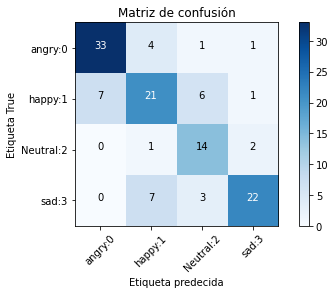

In [38]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')

# **GUARDANDO MODELOS **

Normalizacion

In [39]:
import joblib
joblib.dump(sc , '191_Normalizacion.pkl')

['191_Normalizacion.pkl']

Modelo entrenado

In [40]:
import joblib
joblib.dump(clf , '191_Modelo_Prueba.pkl')

INFO:tensorflow:Assets written to: ram://fbc38bc1-b767-4030-92ea-a3e10f0ce952/assets


['191_Modelo_Prueba.pkl']